In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

print("Total training samples:", info.splits['train'].num_examples)
print("Total test samples:", info.splits['test'].num_examples)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.X4I9ZB_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.X4I9ZB_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.X4I9ZB_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
Total training samples: 25000
Total test samples: 25000


In [3]:
# Extract raw texts and labels into lists
train_texts = []
train_labels = []
for text, label in train_data:
    train_texts.append(text.numpy().decode('utf-8'))
    train_labels.append(label.numpy())

test_texts = []
test_labels = []
for text, label in test_data:
    test_texts.append(text.numpy().decode('utf-8'))
    test_labels.append(label.numpy())



In [4]:
# Tokenize the texts
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_texts)



In [5]:
# Convert to sequences
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)



In [6]:
# Pad sequences
max_length = 250
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')



In [7]:
# Convert labels to numpy arrays
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)


In [8]:
model = Sequential([
    Embedding(10000, 16, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    train_padded, train_labels,
    epochs=10,
    validation_data=(test_padded, test_labels),
    verbose=2
)

Epoch 1/10
782/782 - 7s - 9ms/step - accuracy: 0.7146 - loss: 0.5608 - val_accuracy: 0.7996 - val_loss: 0.4261
Epoch 2/10
782/782 - 9s - 11ms/step - accuracy: 0.8659 - loss: 0.3247 - val_accuracy: 0.8656 - val_loss: 0.3261
Epoch 3/10
782/782 - 8s - 10ms/step - accuracy: 0.8951 - loss: 0.2627 - val_accuracy: 0.8487 - val_loss: 0.3425
Epoch 4/10
782/782 - 9s - 11ms/step - accuracy: 0.9071 - loss: 0.2314 - val_accuracy: 0.8614 - val_loss: 0.3288
Epoch 5/10
782/782 - 4s - 5ms/step - accuracy: 0.9201 - loss: 0.2068 - val_accuracy: 0.8701 - val_loss: 0.3193
Epoch 6/10
782/782 - 6s - 8ms/step - accuracy: 0.9299 - loss: 0.1881 - val_accuracy: 0.8600 - val_loss: 0.3410
Epoch 7/10
782/782 - 10s - 13ms/step - accuracy: 0.9382 - loss: 0.1677 - val_accuracy: 0.8514 - val_loss: 0.3798
Epoch 8/10
782/782 - 10s - 13ms/step - accuracy: 0.9420 - loss: 0.1588 - val_accuracy: 0.8620 - val_loss: 0.3628
Epoch 9/10
782/782 - 10s - 13ms/step - accuracy: 0.9468 - loss: 0.1482 - val_accuracy: 0.8552 - val_loss:

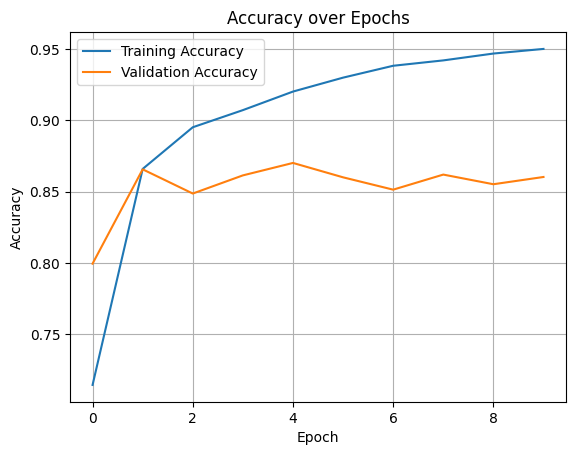

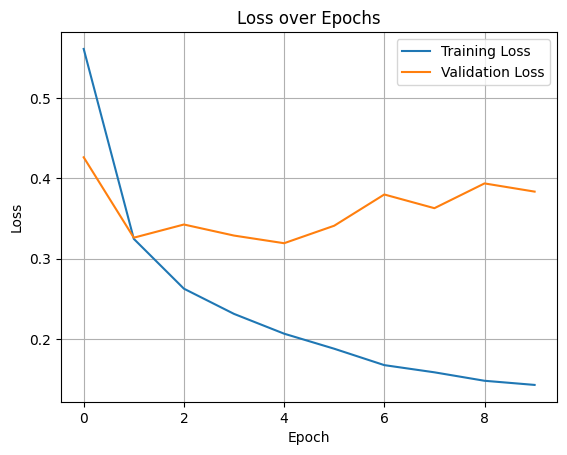

In [10]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [11]:
def predict_sentiment(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=max_length, padding='post')
    prediction = model.predict(padded)[0][0]
    print(" Review:", text)
    print("Sentiment:", "Positive" if prediction > 0.5 else "Negative", f"({prediction:.2f})")

# Example
predict_sentiment("This movie was absolutely fantastic and emotional!")
predict_sentiment("Worst movie ever. It was so boring and predictable.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
 Review: This movie was absolutely fantastic and emotional!
Sentiment: Positive (0.86)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
 Review: Worst movie ever. It was so boring and predictable.
Sentiment: Negative (0.02)


In [12]:
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# Save model again to be safe
model.save("sentiment_model_imdb.h5")


In [13]:
from google.colab import files

files.download("sentiment_model_imdb.h5")
files.download("tokenizer.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>